<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyPARTICLE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>PARTICLE</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyPARTICLE.png"></td>
</tr>
</table>

----
# `pyPARTICLE`

pyPARTICLE, a program package for particle flow and transport.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import libPARTICLE

----
## Vertical Stokes flow
In this notebook, we implement a more realistic flow component for **vertical flow**, the **Stokes flow**.
Here, particles ...
- move downwards due to gravity
- move upwards due to buoyancy

<img src='images/Sketch_StokesFlow.jpg' style=height:80mm;>

The **vertical velocity** of particles in the fluid is then controlled by two forces:

- **Gravitational force $F_g$ [N]**
$$
F_g = m g
$$
with $m$ [kg] mass,
$g$ [m/s$^2$] gravitational acceleration.

- **Drag force $F_d$ [n]**
$$
F_d = -6 \pi \eta v_y r
$$
with $\eta$ [Pas] fluid viscosity, 
$r$ [m] radius of particle,
$v_y$ [m/s] vertical flow velocity.

The **mass** is the mass of the water volume displaced by the particle. 
Consider 
- a water density $\rho_f$ [kg/m$^3$] and
- a particle density $\rho_p$ [kg/m$^3$],
we can replace the mass by
$$
\begin{array}{rcl}
m &=& \left( \rho_p - \rho_f \right) V \\
&=& \left( \rho_p - \rho_f \right) \frac{4}{3} \pi r^3
\end{array}
$$
In the last equation, we assumed that the particles are spherical.

Under **equilibrium conditions**, gravitational and drag force are equal, $F_g+F_d=0$, then
solving for velocity results in
$$\fbox{$
v_y = \frac{2 \left( \rho_p - \rho_f \right) g}{9 \eta} r^2
$}$$

**Note:** While drag force is proportional to $r$, gravitational force to $r^3$, 
the resulting velocity is proportional to $r^2$.

For large particle radii, the velocity does no longer increase with the square of radius,
but according to:
$$
v_y = \frac{R g D^2}{18 \nu + \sqrt{0.75 0.4 R g D^3}}
$$
with 
$\nu = \frac{\eta}{\rho}$ the dynamic viscosity [m$^2$/s],
$D=2r$ particle diameter,
$R=\frac{\rho_p}{\rho_f}-1$ specific relative density.

In [2]:
def particleVelocityStokes(r,rhoParticle=1650,TC=10):
    """
    Particle motion: 
    Stokes drag velocity
    """
    g = 9.81
    vStokes = 2*(rhoParticle - libPARTICLE.water_density(TC)) *g / 9. / libPARTICLE.water_viscosity(TC) * r**2
    return vStokes

def particleVelocityFerguson(r,TC=20.,rho_p=1650.):
    # Stokes drag velocity corrected for large radii by Ferguson et al.
    g = 9.81
    D = 2*r
    R = rho_p / libPARTICLE.water_density(TC) - 1.
    nu = libPARTICLE.water_viscosity(TC) / libPARTICLE.water_density(TC)
    vFerguson = R *g * D**2 / (18. * nu + np.sqrt(0.75*0.4*R*g*D**3))
    return vFerguson

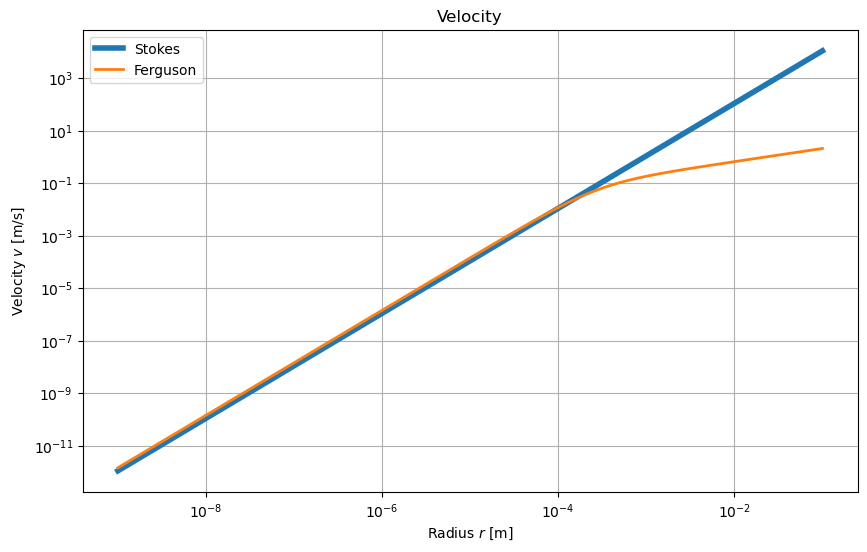

In [3]:
# define radius array
r = np.logspace(-9,-1,101)

plt.figure(figsize=(10,6))
plt.title('Velocity')
plt.xlabel('Radius $r$ [m]')
plt.ylabel('Velocity $v$ [m/s]')
plt.loglog(r,particleVelocityStokes(r),lw=4,label='Stokes')
plt.loglog(r,particleVelocityFerguson(r),lw=2,label='Ferguson')
plt.legend()
plt.grid()

----
## Example 1: Stokes flow
We first run the Stokes flow settling with the pre-defined particle `1`, which has the largest radius, 
and therefore sinks fast.

**Note:** We have re-defined the `dist` variable to the average radius distance
between the particles (see libraray ...).

In [4]:
materials = libPARTICLE.particleMaterials(show=False)
i=1
print(materials[i])

{'id': 1, 'type': 'gravel', 'radius': 0.001, 'density': 2600}


In [5]:
Nfloat=1000;Nsettled=100
sidex=0.5;sidey=0.2
seedx=0.15;seedy=0.12
sigmax=0.05;sigmay=0.01
xdiff=0.005;ydiff=0.01
xadv=0.00;yadv=True
path='div/stokes1';name='stokes1'

pX,pY,pState,pMaterial = libPARTICLE.particleInit(Nfloat=Nfloat,Nsettled=Nsettled,sidex=sidex,sidey=sidey,seedx=seedx,seedy=seedy,sigmax=sigmax,sigmay=sigmay)
materials = libPARTICLE.particleMaterials(show=False)
libPARTICLE.particlePlot(pX,pY,pState,pMaterial,sidex=sidex,sidey=sidey,path=path,name=name)
libPARTICLE.particleRun(pX,pY,pState,pMaterial,materials,tmax=0.15,dt=0.01,sidex=sidex,sidey=sidey,xdiff=xdiff,ydiff=ydiff,xadv=xadv,yadv=yadv,path=path,name=name)

User settings:  {'sidex': 0.5, 'sidey': 0.2, 'seedx': 0.15, 'seedy': 0.12, 'sigmax': 0.05, 'sigmay': 0.01}
User settings:  {'sidex': 0.5, 'sidey': 0.2, 'xdiff': 0.005, 'ydiff': 0.01, 'xadv': 0.0, 'yadv': True, 'path': 'div/stokes1', 'name': 'stokes1'}
path:  div/stokes1
name:  stokes1
mean radius 0.000625 m
1 2 3 4 5 6 7 8 9 10 11 12 13 14 

With **gravel** as particles, having a large radius and thus being heavy, we can see a fast settling of
particles within the calculated period of 0.15 s.

----
## Example 2: Stokes flow
We then run the Stokes flow settling with  particle `2`, which has a smaller radius, 
and therefore sinks **less** fast.

We achieve this by changing all particles with material number 1 to 2, using `numpy.where`.

In [6]:
i=2
print(materials[i])

{'id': 2, 'type': 'sand', 'radius': 0.0004, 'density': 2400}


In [7]:
Nfloat=1000;Nsettled=100
sidex=0.5;sidey=0.2
seedx=0.15;seedy=0.12
sigmax=0.05;sigmay=0.01
xdiff=0.005;ydiff=0.01
xadv=0.00;yadv=True
path='div/stokes2';name='stokes2'

pX,pY,pState,pMaterial = libPARTICLE.particleInit(Nfloat=Nfloat,Nsettled=Nsettled,sidex=sidex,sidey=sidey,seedx=seedx,seedy=seedy,sigmax=sigmax,sigmay=sigmay)
materials = libPARTICLE.particleMaterials(show=False)

pMaterial = np.where(pMaterial==1,2,0)

libPARTICLE.particlePlot(pX,pY,pState,pMaterial,sidex=sidex,sidey=sidey,path=path,name=name)
libPARTICLE.particleRun(pX,pY,pState,pMaterial,materials,tmax=1.0,dt=0.01,sidex=sidex,sidey=sidey,xdiff=xdiff,ydiff=ydiff,xadv=xadv,yadv=yadv,path=path,name=name)

User settings:  {'sidex': 0.5, 'sidey': 0.2, 'seedx': 0.15, 'seedy': 0.12, 'sigmax': 0.05, 'sigmay': 0.01}
User settings:  {'sidex': 0.5, 'sidey': 0.2, 'xdiff': 0.005, 'ydiff': 0.01, 'xadv': 0.0, 'yadv': True, 'path': 'div/stokes2', 'name': 'stokes2'}
path:  div/stokes2
name:  stokes2
mean radius 0.000625 m
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

With **sand** as particles, having a less large radius and thus being less heavy, we can see a slower settling of
particles within the calculated period of 1.0 s.

----